In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from sofia_redux.toolkit.resampling.resample_utils import (
    coordinate_covariance, distribution_variances)


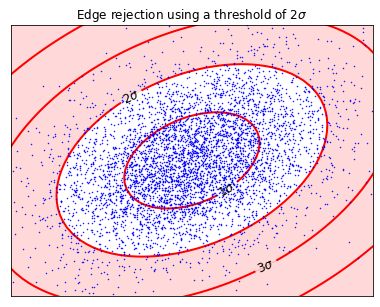

In [5]:
center = np.zeros(2)
threshold = 1.0

cov = np.array([[1.0, 0.25], [0.25, 0.5]])
# cov = np.array([[1.0, 0.0], [0.0, 1.0]])
cov /= np.linalg.det(cov)
coordinates = np.random.multivariate_normal(center, cov, 5000).T


x, y = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
covariance = coordinate_covariance(coordinates)

xy = np.stack([x.ravel(), y.ravel()])


# sigma = np.sqrt(calculate_distribution_variance(xy, center, cov))

sigma = np.sqrt(distribution_variances(xy, mean=center, covariance=covariance))


# g = multivariate_gaussian(covariance, xy)
# plt.contour(x, y, g.reshape(x.shape), levels=3)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.contourf(x, y, sigma.reshape(x.shape), colors=(['white'] * 2) + (['red'] * 5),
             alpha=0.15, levels=np.arange(7))

ax.plot(*coordinates, '.', markersize=1, color='blue')

sigma_plot = ax.contour(x, y, sigma.reshape(x.shape), colors=['red'],
                        linestyles='solid', levels=np.arange(7),
                        linewidths=2)


# plt.colorbar(sigma_plot)


ax.set_ylim(-3, 3)
ax.set_xlim(-4, 4)
ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.clabel(sigma_plot, fmt='%i$\sigma$', colors='black', fontsize='larger')
ax.set_title('Edge rejection using a threshold of 2$\sigma$')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


In [ ]:
x = 56
y = 93